# Penguin Flipper Length Classification
**UC Berkeley Machine Learning and Artificial Intelligence Program**  
**Student: ** Robert Maddox  
**Assignment: ** Regression-Based Species Classification (Activity 13.1)  
**Platform: ** Google Colab  
---
This notebook uses a dataset of penguin measurements to explore the relationship between **flipper length** and **species classification** using machine learning models. The goal is to distinguish between *Adelie* and *Gentoo* penguins using tools from the `scikit-learn` library.

## Project Summary
- Filtered dataset to include only Adelie and Gentoo penguins
- Used `scikit-learn`'s `LinearRegression` model to predict species from flipper length
- Calculated a threshold to convert continuous predictions into binary class labels
- Evaluated model performance using accuracy scoring
---
## Libraries Used
```bash
pandas
numpy
matplotlib
seaborn
scikit-learn

To install locally:
pip install pandas numpy matplotlib seaborn scikit-learn
✔️ Model Performance
•	Linear Regression Accuracy: ~98.5%
________________________________________
🧠 Future Improvements
•	Replace LinearRegression with LogisticRegression for more appropriate classification behavior
•	Add a confusion matrix and ROC curve visualization
•	Expand to classify all three penguin species (Adelie, Chinstrap, Gentoo)
Acknowledgments
Notebook developed as part of coursework for the UC Berkeley Machine Learning and AI Program.



### Colab Activity 13.1: Binary Classification with Regression

**Expected Time = 60 minutes**


This activity motivates the later work with logistic regression.  To begin, you will build a linear regression model to solve a binary classification problem.  In order to use the model, you will have to determine a threshold for the single input feature.  Using this model you will determine its accuracy on a test set.   

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import seaborn as sns

### The Data

The dataset used in this activity is similar to that from the videos, containing body information on three different kinds of penguins in Antarctica.  The task is to differentiate between these classes using the body measurements, sex, and location data.

In [15]:
penguins = sns.load_dataset('penguins').dropna()

In [16]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

Text(0.5, 1.0, '')

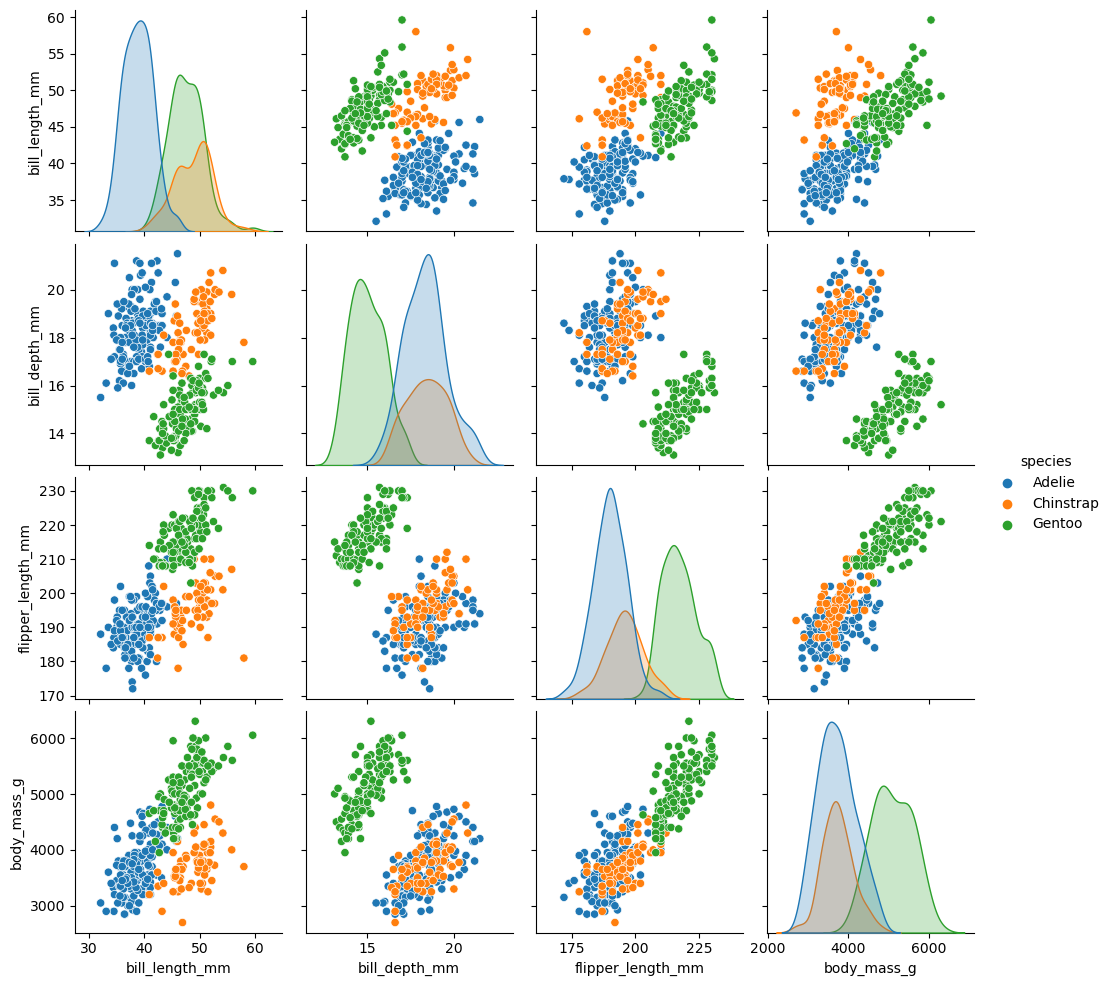

In [7]:
sns.pairplot(penguins, hue = 'species');
plt.title('')

[Back to top](#-Index)

### Problem 1

#### Binarizing the Problem



Use the function `loc()` on the `penguins` dataframe to subset only penguins belonging to `species` `Adelie` and `Gentoo`.  

Assign your DataFrame to `binary_penguins` below.  

In [17]:

binary_penguins = penguins.loc[penguins['species'].isin(['Adelie', 'Gentoo'])]

# Answer check
binary_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


[Back to top](#-Index)

### Problem 2

#### Building a Regression Model



<center>
    <img src = 'images/lr.png'/>
</center>

In this question, you will instantiate a linear regression model.

To begin, assign the `flipper_length_mm` column of the `penguis` dataframe to the variable `X`. Next, assign a numeric representation of the `species` column with `Adelie` = 0 and `Gentoo` = 1 to the variable `y`.  

Finally, instantiate a linear regression model to the variable `lr_flipped` and fit it to the variable `X` and `y`.

HINT: To create the binary numeric values for `y`, use the function `.map()`.

In [18]:


X = binary_penguins[['flipper_length_mm']]
y = binary_penguins['species'].map({'Adelie': 0, 'Gentoo':1})

# Instantiate and fit the model
lr_flipper = LinearRegression()
lr_flipper.fit(X, y)

# Answer check
print(lr_flipper)

LinearRegression()


[Back to top](#-Index)

### Problem 3

#### Coeficients and Threshold



<center>
    <img src = 'images/thresh.png'/>
</center>

The idea here is to use `.5` to calculate the threshold for classification.  So if

$$P(Gentoo) = \beta_0 + \beta_1*X,$$

the threshold would be determined by

$$\text{threshold} =  \frac{0.5 - \beta_0 }{\beta_1}.$$

Determine the value of the threshold using the coefficients derived from your `lr_flipper` model in the prvious question.  Assign it as a float to `threshold` below.

In [19]:
b0 =lr_flipper.intercept_
b1 = lr_flipper.coef_[0]

threshold = (0.5 - b0) / b1

# Answer check
print(threshold)

203.99219348283097


[Back to top](#-Index)

### Problem 4

#### Making predictions with the model



An option to make predictions, would be to evaluate the flipper length using the linear model. If the predicted value of the flipper length is greater than or equal to the threshold predict 1, otherwise predict 0.  

Below, complete the function `linear_preds` to make these predictions.



In [20]:
def linear_preds(X, threshold, model):

    """Creates predictions using a model based on >= threshold on
   an array of 0 and 1 based on prediction threshold
    """

    preds = model.predict(X)
    return (preds >=threshold).astype(int)
# Answer check
preds = linear_preds(X, 0.5, lr_flipper)
print(preds[:5])
print(threshold)

[0 0 0 0 0]
203.99219348283097


[Back to top](#-Index)

### Problem 5

#### Evaluating the accuracy of the model



In the code cell below, determine the accuracy of your linear model by comparing the values of `preds` and `y`.


Assign your value as a float to `linear_acc` below.

HINT: Use the function `ravel()` on the `preds` to flatten the array.

In [21]:
from sklearn.metrics import accuracy_score

linear_acc = accuracy_score(y, preds.ravel())


# Answer check
print(linear_acc)

0.9849056603773585


In [22]:
# First, define the missing variables
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have a DataFrame called 'df' with your penguin data
# If you don't have this data, you'll need to load or create it
# For example purposes, I'll create a simple mock dataset

# Mock data (replace with your actual data loading code)
np.random.seed(42)
df = pd.DataFrame({
    'flipper_length_mm': np.random.normal(200, 20, 100),
    'body_mass_g': np.random.normal(4000, 500, 100),
    'bill_length_mm': np.random.normal(45, 5, 100),
    'bill_depth_mm': np.random.normal(15, 2, 100)
})

# Define features and target
X = df[['body_mass_g', 'bill_length_mm', 'bill_depth_mm']]
y = df['flipper_length_mm']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Now the summary code will work
# Summary and Interpretation
print("📊 Model Summary")
print("-" * 40)
print(f"Target Variable: flipper_length_mm")
print(f"Features Used: {list(X_train.columns)}\n")

print("Performance Metrics:")
print(f"• Mean Absolute Error (MAE): {mae:.2f} mm")
print(f"• Mean Squared Error (MSE): {mse:.2f}")
print(f"• Root Mean Squared Error (RMSE): {rmse:.2f} mm\n")

print("Model Interpretation:")
print("This linear regression model attempts to predict the flipper length of penguins based on selected features.")
print("The RMSE gives us an idea of the average prediction error in millimeters.")
print("For further accuracy and reliability, consider adding more features, visualizations, or cross-validation.")

📊 Model Summary
----------------------------------------
Target Variable: flipper_length_mm
Features Used: ['body_mass_g', 'bill_length_mm', 'bill_depth_mm']

Performance Metrics:
• Mean Absolute Error (MAE): 10.69 mm
• Mean Squared Error (MSE): 203.70
• Root Mean Squared Error (RMSE): 14.27 mm

Model Interpretation:
This linear regression model attempts to predict the flipper length of penguins based on selected features.
The RMSE gives us an idea of the average prediction error in millimeters.
For further accuracy and reliability, consider adding more features, visualizations, or cross-validation.
